# Creating Interactive Teaching Narratives Using Jupyter Notebooks

*Tony Hirst*

`@psychemedia`

## A Jupyter notebook is:

- an interactive enviroMNent accessed via a browser

- that can be served on your own computer or over the web

- that can display rich text- like $\sqrt{3x-1}+(1+x)^2$ - inline, as well as `inline code` fragments

- embed images, videos, audio players, etc

## Notebooks can be used as calculators

In [1]:
#Do some sums


## Notebooks can be used to work with data

- load data in from CSV or Excel files, web locations, or create directly

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [25]:
#Define a variable
frequency=1

#Define a list of numbers
# in the range 0..1 with step size 0.2
timestamps=np.arange(0.0,1.0,0.02)

timestamps

array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
        0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
        0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
        0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
        0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
        0.9 ,  0.92,  0.94,  0.96,  0.98])

## Notebooks can plot charts

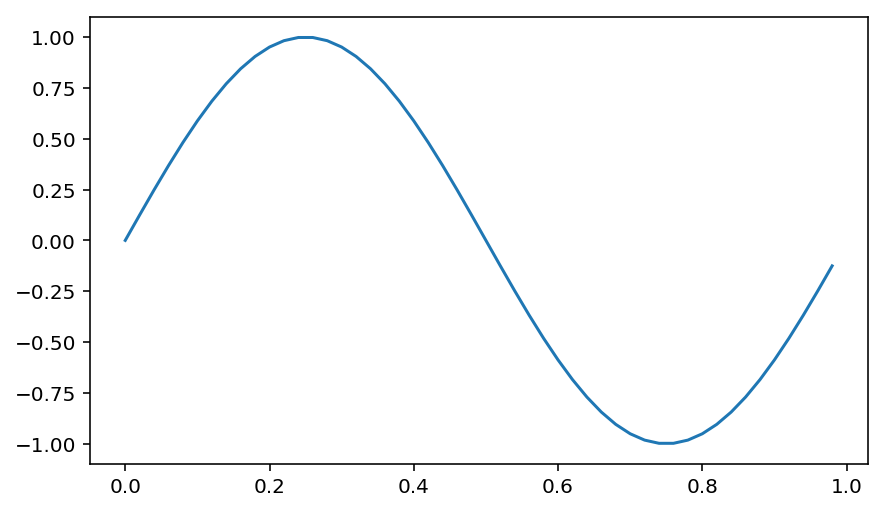

In [26]:
plt.plot(timestamps,np.sin(2*np.pi*timestamps*frequency));

In [5]:
frequency=5

## Notebooks Can Be Used to Create Simple Interactives

In [6]:
from ipywidgets import interact

def pltsin(f):
    plt.plot(timestamps,np.sin(2*np.pi*timestamps*f))

In [7]:
interact(pltsin,f=(0,10,1));

A Jupyter Widget

## Notebooks can embed maps

In [8]:
import folium
mymap = folium.Map(location=[52.0236, -0.7088], zoom_start=15,
                   width=600, height=300, tiles='Stamen Terrain')

In [9]:
#Add two markers to the map
#folium.Marker([52.0239, -0.7072], popup='OU Library').add_to(mymap)
#folium.Marker([52.0242, -0.7112], popup='Jennie Lee Building').add_to(mymap)

mymap

## Notebooks Can Call Arbitrary Webservices

In [10]:
import requests
postcode = 'MK7 6AA'

r=requests.get('https://api.postcodes.io/postcodes/{PC}'.format(PC=postcode)).json()['result']
lat=r['latitude']; lon=r['longitude']; pc=r['parliamentary_constituency']
mymap = folium.Map(location=[lat, lon], zoom_start=15, width=600, height=300)

#Create a popup message
popupstr = 'Location of {PC} in the {pc} constituency'.format(PC=postcode,pc=pc)

#Display a marker for the location
folium.Marker([lat, lon], popup=popupstr).add_to(mymap)
mymap

## And That's Just for Starters...

- work with musical notation, create and embed sounds

- use notebooks as a rich authoring environment

- export to Microsoft Word, PDF or HTML

- create slideshows like this...

## A Wide Range of Third Party Packages Have Notebook Support

In [11]:
import MDAnalysis as mda
import nglview as nv
from nglview.datafiles import PDB, XTC
import warnings
warnings.filterwarnings("ignore")

u = mda.Universe(PDB, XTC)

protein = u.select_atoms('protein')
nv.show_mdanalysis(protein)

/usr/local/lib/python3.5/dist-packages/MDAnalysis/__init__.py:245: UserWarning: #####
MDAnalysis on python 3 is highly experimental!
It is mostly non functional and dramatically untested.
Use at your own risks!!!

  ''')


A Jupyter Widget

## Draw Molecules with `rdkit`
Note this also shows how to access a second, python2, environment from the notebook.

In [13]:
%%python2
from rdkit import Chem
from rdkit.Chem import Draw
m = Chem.MolFromSmiles('COc1ccc2c(c1)[nH]c(n2)[S@@](=O)Cc1ncc(c(c1C)OC)C')
Draw.MolToFile(m,'cdk2_mol1.o.png')

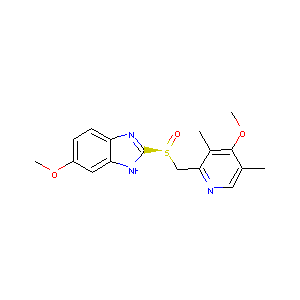

In [14]:
from IPython.display import Image
Image('cdk2_mol1.o.png')

## Diagrams Using Graphviz `dot` language

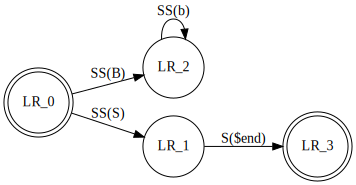

In [39]:
# http://www.graphviz.org/content/fsm
from graphviz import Digraph
f = Digraph('finite_state_machine')
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='doublecircle')
f.node('LR_0') ;f.node('LR_3');

f.attr('node', shape='circle')
f.edge('LR_0', 'LR_2', label='SS(B)'); f.edge('LR_0', 'LR_1', label='SS(S)')
f.edge('LR_1', 'LR_3', label='S($end)'); f.edge('LR_2', 'LR_2', label='SS(b)')

f

## Not Just Science and Engineering...

For music, we need to set up some mess - though there are ways round this...

In [40]:
from music21 import *

environment.UserSettings()['lilypondPath']='/usr/bin/lilypond'
environment.set('pdfPath', '/usr/bin/musescore')
environment.set('graphicsPath', '/usr/bin/musescore')
environment.set("musescoreDirectPNGPath", "/usr/bin/musescore")
environment.set("musicxmlPath", "/usr/bin/musescore")

from IPython.display import Image

### But then things get easier

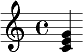

In [14]:
c = chord.Chord("C4 E4 G4")
c.isConsonant()
c.show('lily.png')
Image(filename=c.write('lily.png'))

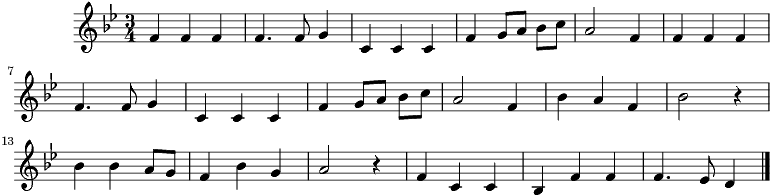

In [15]:
myBach = corpus.parse('bach/bwv57.8')
alto = myBach.parts['Alto']

alto.show('lily.png')
Image(filename=alto.write('lily.png'))

## Electrical Circuits

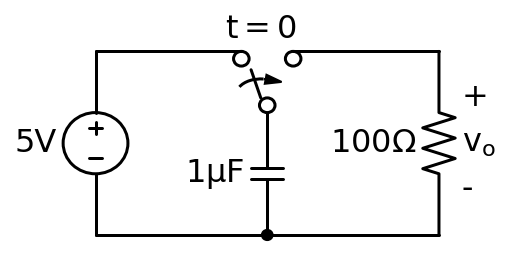

In [16]:
import SchemDraw as schem
import SchemDraw.elements as e

d = schem.Drawing()
V1 = d.add(e.SOURCE_V, label='5V')
d.add(e.LINE, d='right', l=d.unit*.75)
S1 = d.add(e.SWITCH_SPDT2_CLOSE, d='up', anchor='b', rgtlabel='$t=0$')
d.add(e.LINE, d='right', xy=S1.c,  l=d.unit*.75)
d.add(e.RES, d='down', label='$100\Omega$', botlabel=['+','$v_o$','-'])
d.add(e.LINE, to=V1.start)
d.add(e.CAP, xy=S1.a, d='down', toy=V1.start, label='1$\mu$F')
d.add(e.DOT)
d.draw(showplot=False)

## Scientific Drawings - Asymptote

In [17]:
drawingspec = '''
import math; import graph; import geometry;
size(12cm); xaxis("$x$"); yaxis("$y$");
real theta1={theta1}; real theta2={theta2};
real L1=0.45; real L2=0.48;
pair l1p = (L1*sin(theta1), L1*cos(theta1));
pair l2p = l1p + (L2*sin(theta1+theta2), L2*cos(theta1+theta2));
draw((0,0)--l1p--l2p); draw(l1p--l1p*1.5, dashed); dot(l2p); draw((0,0)--l2p, dashed); 
label("$J1(0,0)$", (0,0), NW); label("$J2(u,v)$", l1p, NW); label("$H(x,y)$", l2p, NE);
draw("$L1$",(0,0)-0.02*I*l1p--l1p-0.02*I*l1p, red, Arrows, Bars, PenMargins);
draw("$L2$", l1p-0.02*I*l2p--l2p-0.02*I*l2p, red, Arrows, Bars, PenMargins);
draw("$\\theta_1$", arc((0,1),(0,0),l1p,0.1), blue, PenMargins);
draw("$\\theta_2$", arc(l1p,0.1,degrees(l1p),degrees(l2p-l1p),CW), blue, PenMargins);
draw("$\\alpha$", arc((1,0),(0,0),l2p,0.2), blue, PenMargins);
'''

In [18]:
import subprocess # to run asymptote
import shlex

## Our Drawings are Now Reproducible and Maintainable

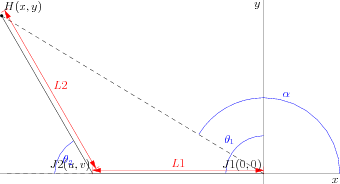

In [19]:
f=open('/tmp/pa10-firstjoint.asy', 'w')

theta1='-pi/2'  ;   theta2='pi/3'

f.write(drawingspec.format(theta1=theta1,theta2=theta2)); f.close()
subprocess.call(shlex.split('asy /tmp/pa10-firstjoint.asy -f png -o pa10-firstjoint.png'))
Image('pa10-firstjoint.png')

## Doing Symbolic Maths

In [20]:
#Import sympy packages
import math
from sympy import *
from sympy import init_printing
init_printing()

b,c,B,C=symbols(['b','c','B','C'])

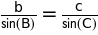

In [21]:
#A simple example of the sine rule
exp=Eq(b/sin(B),c/sin(C))
exp

## `sympy` Symbolic Maths Packages Lets You Solve Equations

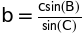

In [49]:
#We can solve for b:
distance_b = solve(exp)[0][b]
Eq(b, distance_b)

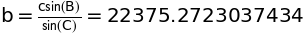

In [50]:
#Then we can substitute in values
Eq(Eq(b,distance_b), distance_b.subs({c:27404,B:math.radians(45),C:math.radians(60)}))

## To get started with notebooks

- Temporary / disposable trial notebooks: `try.jupyter.org`

- Personal notebooks: `notebooks.azure.com` (not OU account?)

- Install on your own computer - via `Anaconda`, one of the many *Docker* containers, or the OU TM351 VM

- Try out the OU / FutureLearn *Learn to Code for Analysis* MOOC

- Join the lobbying for an OU hosted notebook server